In [1]:
import pandas as pd
import math

data = pd.read_csv('us-counties.csv', parse_dates=['date'], index_col='date')

In [2]:
#fig = data[data['county'] == 'New York City']['cases'] 
sc = data[(data['county'] == 'Santa Cruz') & (data['state'] == 'California')] 
ny = data[(data['county'] == 'New York City')]

df = pd.DataFrame({
    "New York": ny,
})
df.plot(figsize=(10,6))


ValueError: If using all scalar values, you must pass an index

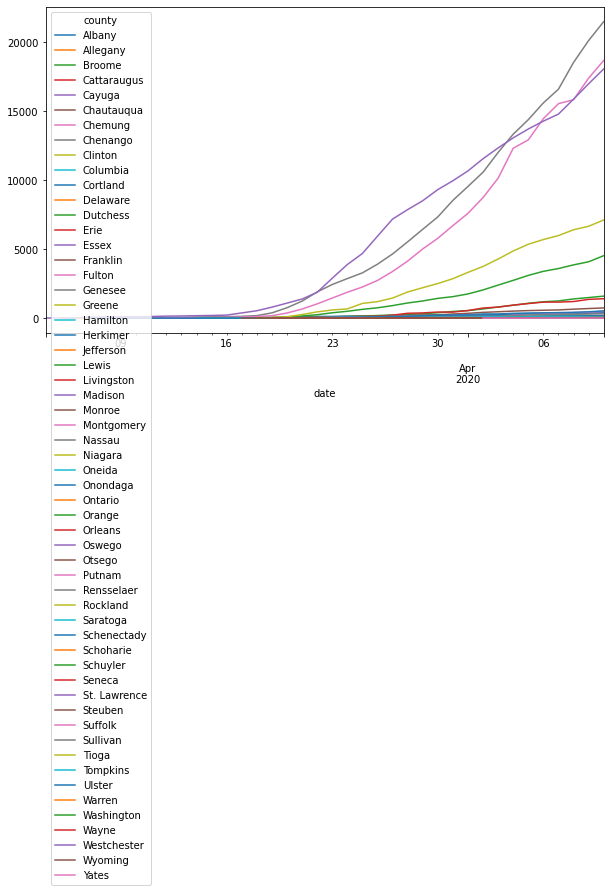

In [3]:

county = ''
state = 'New York'

fips = set()
for row in data.itertuples():
    if county in row.county and state in row.state:
        if not math.isnan(row.fips):
            fips.add(str(row.fips))
    

fig = data.query(f"fips in [{','.join(fips)}]") \
    .pivot(columns='county', values='cases') \
    #.diff() 

fig.plot(figsize=(10,6))
#fig